d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\l

This is save
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
This is reload
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./params


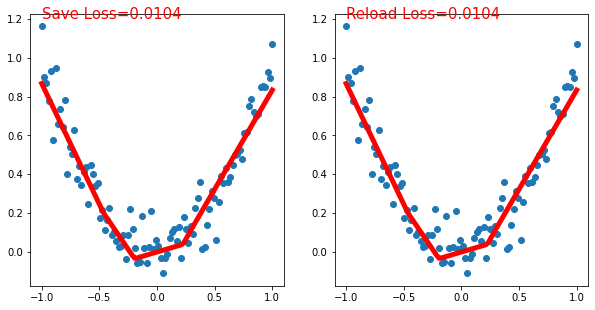

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise


def save():
    print('This is save')
    # build neural network
    tf_x = tf.placeholder(tf.float32, x.shape)  # input x
    tf_y = tf.placeholder(tf.float32, y.shape)  # input y
    l = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
    o = tf.layers.dense(l, 1)                     # output layer
    loss = tf.losses.mean_squared_error(tf_y, o)   # compute cost
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())  # initialize var in graph

    saver = tf.train.Saver()  # define a saver for saving and restoring

    for step in range(100):                             # train
        sess.run(train_op, {tf_x: x, tf_y: y})

    saver.save(sess, './params', write_meta_graph=False)  # meta_graph is not recommended

    # plotting
    pred, l = sess.run([o, loss], {tf_x: x, tf_y: y})
    plt.figure(1, figsize=(10, 5))
    plt.subplot(121)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Save Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})


def reload():
    print('This is reload')
    # build entire net again and restore
    tf_x = tf.placeholder(tf.float32, x.shape)  # input x
    tf_y = tf.placeholder(tf.float32, y.shape)  # input y
    l_ = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
    o_ = tf.layers.dense(l_, 1)                     # output layer
    loss_ = tf.losses.mean_squared_error(tf_y, o_)   # compute cost

    sess = tf.Session()
    # don't need to initialize variables, just restoring trained variables
    saver = tf.train.Saver()  # define a saver for saving and restoring
    saver.restore(sess, './params')

    # plotting
    pred, l = sess.run([o_, loss_], {tf_x: x, tf_y: y})
    plt.subplot(122)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Reload Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})
    plt.show()


save()

# destroy previous net
tf.reset_default_graph()

reload()